In [81]:
# import the librarries
import pandas as pd
import numpy as np
import seaborn as sns


In [55]:
# Read the file
df=pd.read_csv('retail_dataset.csv')

In [56]:
df

,Monthly_Sales,Customer_Feedback_Score
0,5248.357077,3.075162
1,4930.867849,3.812076
2,5323.844269,2.454518
3,5761.514928,4.887128
4,4882.923313,4.849789
...,...,...
100,9858.462926,9.280772
101,9957.935468,9.024316
102,9965.728548,9.645472
103,9919.772273,9.177111


1. Data Pre-processing

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly_Sales            105 non-null    float64
 1   Customer_Feedback_Score  105 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [58]:
df.describe()

,Monthly_Sales,Customer_Feedback_Score
count,105.000000,105.000000
mean,5185.651855,3.287966
std,1155.883956,1.768822
min,3690.127448,1.020246
25%,4718.856235,1.975959
50%,4982.086980,3.194935
75%,5305.838144,3.912865
max,9983.871429,9.940459


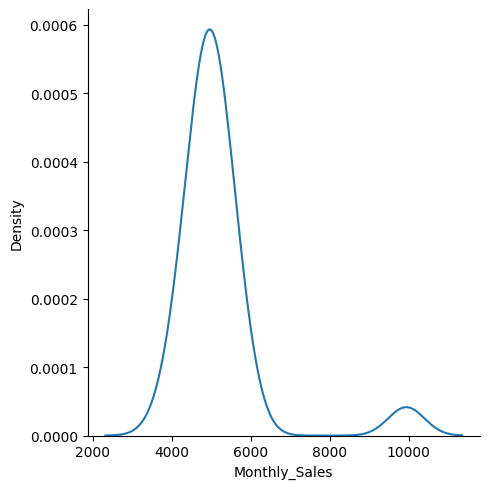

In [59]:
sns.displot(data=df['Monthly_Sales'] , kind='kde')

The above plot is right skewed, which shows presence of outliers

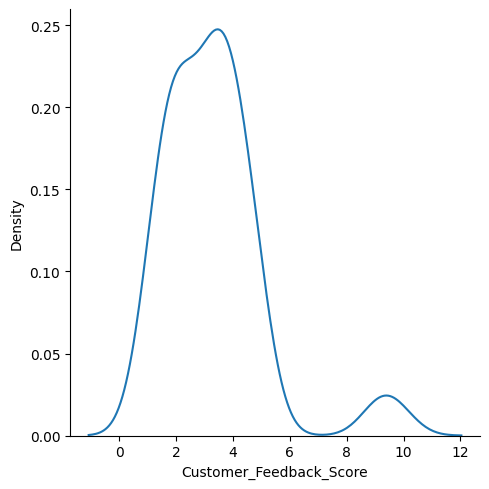

In [60]:
sns.displot(data=df['Customer_Feedback_Score'] , kind='kde')

The above plot is right skewed, which shows presence of outliers

**Outlier Detection and Removal using Tukey's Method**

# Outlier Detection for Monthly Sales

In [61]:
#Goal: Identify th extreme values and remove the same
# To identify the extreme value we need to identify the range
# To identify the range, we will use 1.5 IQR Rule

def OutlierDetection(df,Monthly_Sales):
  #1. Sort the data in ascending order
  sorted(df['Monthly_Sales'])
  #2. Calc Q1 and Q3
  Q1,Q3 = np.percentile(df['Monthly_Sales'], [25,75])

  #3.Calc IQR
  IQR = Q3 - Q1

  #4. Calc valid range
  lowerRange = Q1 - (1.5 * IQR)
  upperRange = Q3 + (1.5 * IQR)

  return lowerRange,upperRange

In [62]:
lr,ur=OutlierDetection(df,df['Monthly_Sales'])

In [63]:
lr

3838.3833718181318

In [64]:
ur

6186.311007981816

In [65]:
#Delete Outliers

processedData = df[ (df['Monthly_Sales'] >= lr) & (df['Monthly_Sales'] <= ur) ]

In [66]:
processedData

,Monthly_Sales,Customer_Feedback_Score
0,5248.357077,3.075162
1,4930.867849,3.812076
2,5323.844269,2.454518
3,5761.514928,4.887128
4,4882.923313,4.849789
...,...,...
95,4268.242526,3.010548
96,5148.060139,3.307616
97,5130.527636,2.970071
98,5002.556728,1.780972


In [67]:
processedData.describe()

,Monthly_Sales,Customer_Feedback_Score
count,99.000000,99.000000
mean,4960.783300,2.979529
std,438.162143,1.141902
min,4006.215543,1.020246
25%,4709.268445,1.967815
50%,4942.175859,3.075162
75%,5218.103043,3.830396
max,5926.139092,4.942602


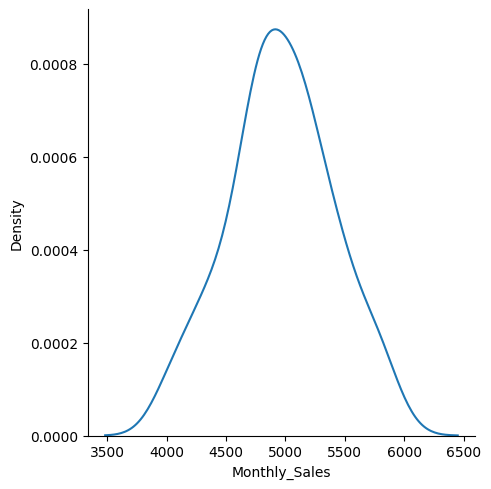

In [68]:
sns.displot(data=processedData['Monthly_Sales'] , kind='kde')

In [69]:
processedData['Monthly_Sales'].mean()

4960.783299821618

# Outlier Detection for Customer_Feedback_Score

In [70]:
#Goal: Identify th extreme values and remove the same
# To identify the extreme value we need to identify the range
# To identify the range, we will use 1.5 IQR Rule

def OutlierDetection(df,Customer_Feedback_Score):
  #1. Sort the data in ascending order
  sorted(df['Customer_Feedback_Score'])
  #2. Calc Q1 and Q3
  Q1,Q3 = np.percentile(df['Customer_Feedback_Score'], [25,75])

  #3.Calc IQR
  IQR = Q3 - Q1

  #4. Calc valid range
  lowerRange = Q1 - (1.5 * IQR)
  upperRange = Q3 + (1.5 * IQR)

  return lowerRange,upperRange

In [71]:
lr,ur=OutlierDetection(df,df['Customer_Feedback_Score'])

In [72]:
lr

-0.9294016578803217

In [73]:
ur

6.818225625844095

In [75]:
#Delete Outliers

processedData = df[ (df['Customer_Feedback_Score'] >= lr) & (df['Customer_Feedback_Score'] <= ur) ]

In [76]:
processedData

,Monthly_Sales,Customer_Feedback_Score
0,5248.357077,3.075162
1,4930.867849,3.812076
2,5323.844269,2.454518
3,5761.514928,4.887128
4,4882.923313,4.849789
...,...,...
95,4268.242526,3.010548
96,5148.060139,3.307616
97,5130.527636,2.970071
98,5002.556728,1.780972


In [77]:
processedData.describe()

,Monthly_Sales,Customer_Feedback_Score
count,100.000000,100.000000
mean,4948.076741,2.981683
std,454.084214,1.136324
min,3690.127448,1.020246
25%,4699.547165,1.968018
50%,4936.521854,3.096882
75%,5202.976026,3.821236
max,5926.139092,4.942602


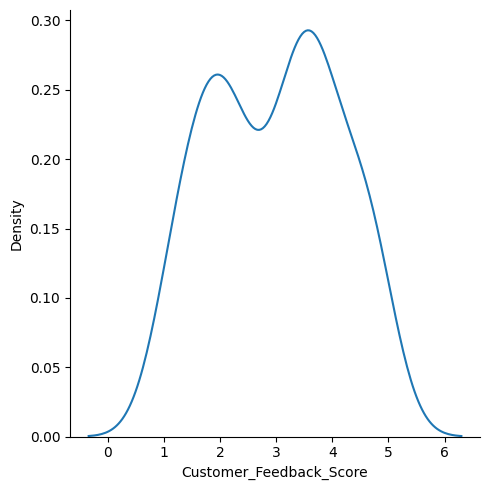

In [78]:
sns.displot(data=processedData['Customer_Feedback_Score'] , kind='kde')

In [79]:
processedData['Customer_Feedback_Score'].mean()

2.981682864053596

The ouliers in both the columns have been sucessfully removed as there is no skewness.

In [80]:
df.describe()

,Monthly_Sales,Customer_Feedback_Score
count,105.000000,105.000000
mean,5185.651855,3.287966
std,1155.883956,1.768822
min,3690.127448,1.020246
25%,4718.856235,1.975959
50%,4982.086980,3.194935
75%,5305.838144,3.912865
max,9983.871429,9.940459


Karishmaa Fernandes